# Automatic Differentiation with ``` TORCH.AUTOGRAD ```

In [2]:
import torch

x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5, 3, requires_grad= True)
b = torch.randn(3, requires_grad= True)
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

### Tensors, Functions and Computational graph

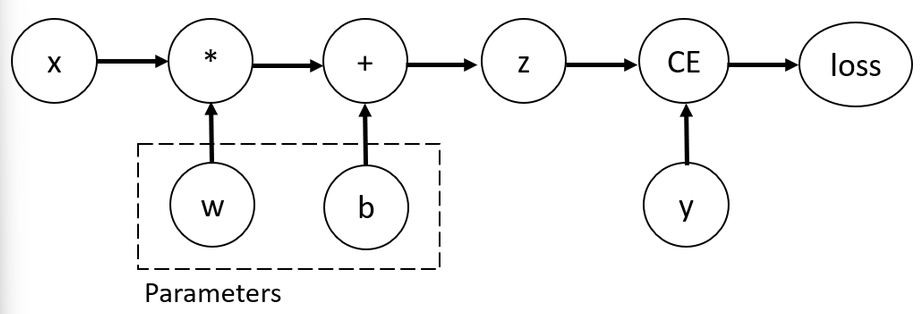

In [3]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7fbf93d62ce0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7fbf93d62fb0>


### Computing Gradients

In [5]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.2938, 0.2871, 0.3187],
        [0.2938, 0.2871, 0.3187],
        [0.2938, 0.2871, 0.3187],
        [0.2938, 0.2871, 0.3187],
        [0.2938, 0.2871, 0.3187]])
tensor([0.2938, 0.2871, 0.3187])


### Disabling Gradient Tracking

In [6]:
z = torch.matmul(x, w) + b
print(z.requires_grad)

with torch.no_grad():
  z = torch.matmul(x, w) + b

print(z.requires_grad)

True
False


Another way to achieve the same result

In [8]:
z = torch.matmul(x, w) + b
z_det = z.detach()

print(z_det.requires_grad)

False


### More on Computational Graphs

Conceptually, autograd keeps a record of data (tensors) and all executed operations (along with the resulting new tensors) in a directed acyclic graph (DAG) consisting of Function objects. In this DAG, leaves are the input tensors, roots are the output tensors. By tracing this graph from roots to leaves, you can automatically compute the gradients using the chain rule.

In a forward pass, autograd does two things simultaneously:

* run the requested operation to compute a resulting tensor

* maintain the operation’s gradient function in the DAG.

The backward pass kicks off when .backward() is called on the DAG root. autograd then:

* computes the gradients from each .grad_fn,

* accumulates them in the respective tensor’s .grad attribute

* using the chain rule, propagates all the way to the leaf tensors.


### Tensor Gradients and Jacobian Products

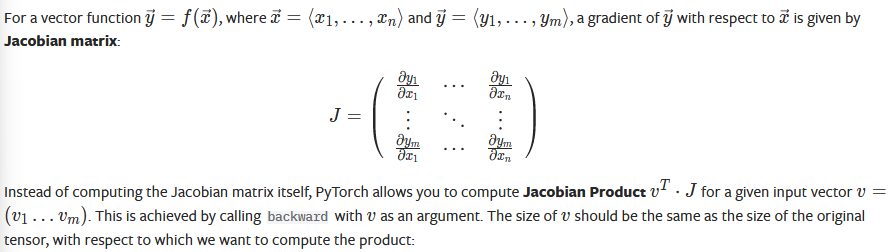

In [12]:
inp = torch.eye(4, 5, requires_grad= True)
out = (inp+1).pow(2).t()
out.backward(torch.ones_like(out), retain_graph= True)
print(f"First call\n{inp.grad}")
out.backward(torch.ones_like(out), retain_graph= True)
print(f"Second call\n{inp.grad}")
inp.grad.zero_()
out.backward(torch.ones_like(out), retain_graph= True)
print(f"\nCall after zeroing gradients\n{inp.grad}")

First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])
Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.]])

Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])
